In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re  # used for pattern matching and text manipulation.
import string 
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score, recall_score, f1_score

In [3]:
df = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=":::",names=['title','genre','description'], engine='python')
test_df = pd.read_csv('../input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt', sep=":::", header=None, engine='python')
test_df.columns=['id','title','genre','description']
df.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [6]:
c=df['genre'].value_counts()
c

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

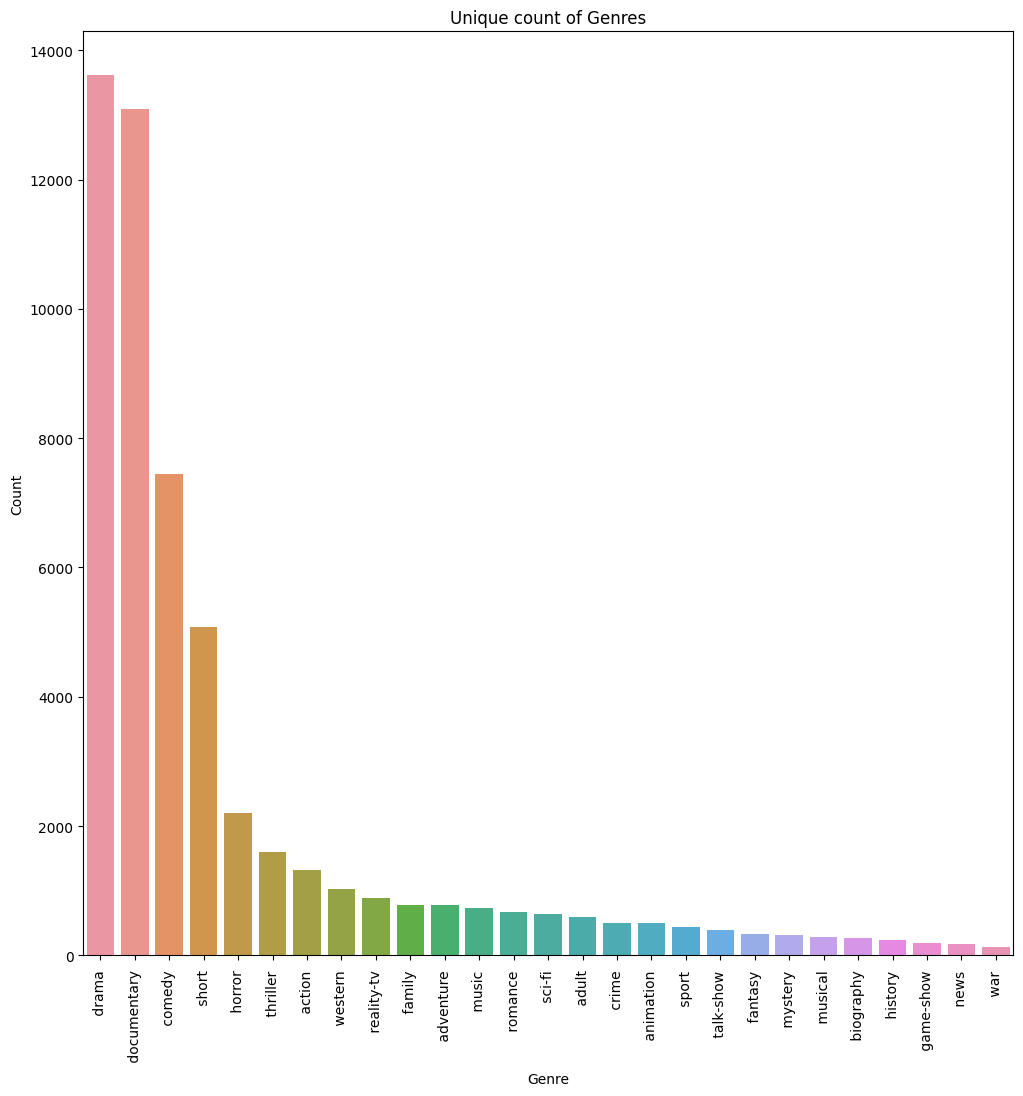

In [7]:
plt.figure(figsize=(12,12))
sns.barplot(x=c.index, y=c)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Unique count of Genres')
plt.xticks(rotation=90);

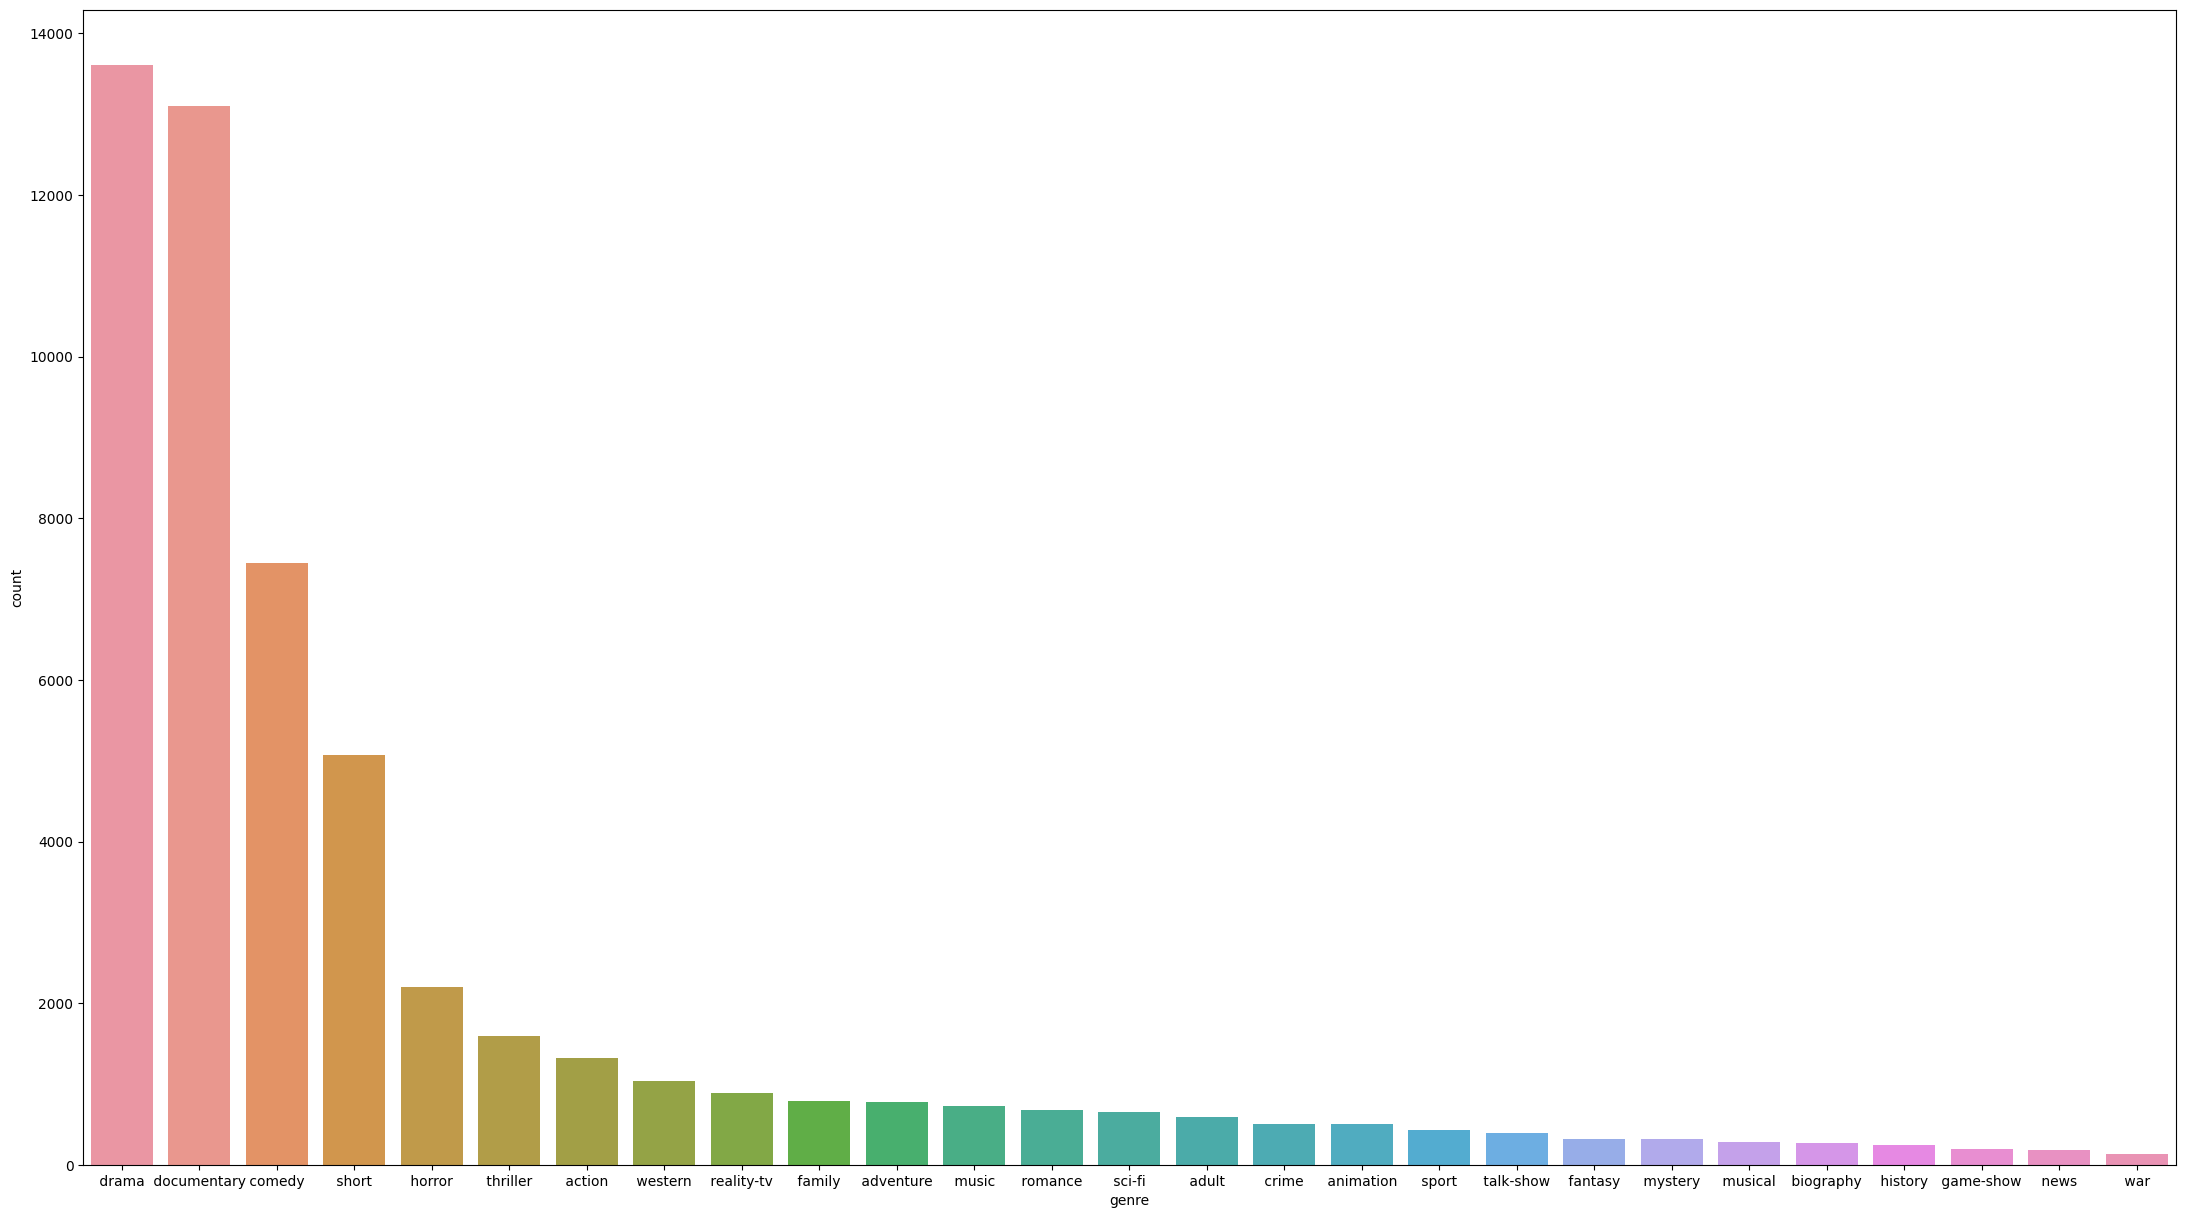

In [8]:
plt.figure(figsize=(27,15))
sns.countplot(data=df, x="genre", order= df['genre'].value_counts().index)
plt.show()

In [9]:
df['length']=df['description'].apply(len)
df.head()
test_df.head()
test_df['length']=test_df['description'].apply(len)
test_df.head()



,id,title,genre,description,length
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",510
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",674
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,590
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",681
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,814


In [10]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def data_cleaning(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

df["TextCleaning"] = df["description"].apply(data_cleaning)
test_df["TextCleaning"] = test_df["description"].apply(data_cleaning)


In [11]:
df.head()
df['length_TextCleaning']=df['TextCleaning'].apply(len)
df.head()

,title,genre,description,length,TextCleaning,length_TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...,383
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...,396
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...,744
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...,401


In [12]:
df

,title,genre,description,length,TextCleaning,length_TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents year old...,383
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...,396
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make ends meet edith tw...,744
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers recovered bodies ground zero...,401
...,...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,507,short lived nbc live sitcom centered bonino wo...,329
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,781,next generation exploitation sisters kapa bay ...,556
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",255,bestaan echt stand comedy growing facing fears...,120
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,642,walter vivian live country difficult time keep...,403


In [13]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(df["TextCleaning"])

X_test = vectorize.transform(test_df["TextCleaning"])

In [14]:
x = X_train
y = df["genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(43371, 116601)
(43371,)
(10843, 116601)
(10843,)


In [16]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x,y)


MultinomialNB()

In [17]:
y_pred = nb_classifier.predict(x)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.47


In [18]:
model1 = LogisticRegression()

In [19]:
model1.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

0.5774232223554366
